# Name: Devashish Lahariya
# Roll No: BCB30

### Problem Statement: Linear regression by using Deep Neural network
Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [16]:
# Import Libraries
from sklearn import datasets
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
warnings.filterwarnings('ignore')


In [17]:
!pip install scikit-learn==1.1.3

In [18]:
# read data from sklearn data set
data=datasets.load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['price']=data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.shape

(506, 14)

<Axes: >

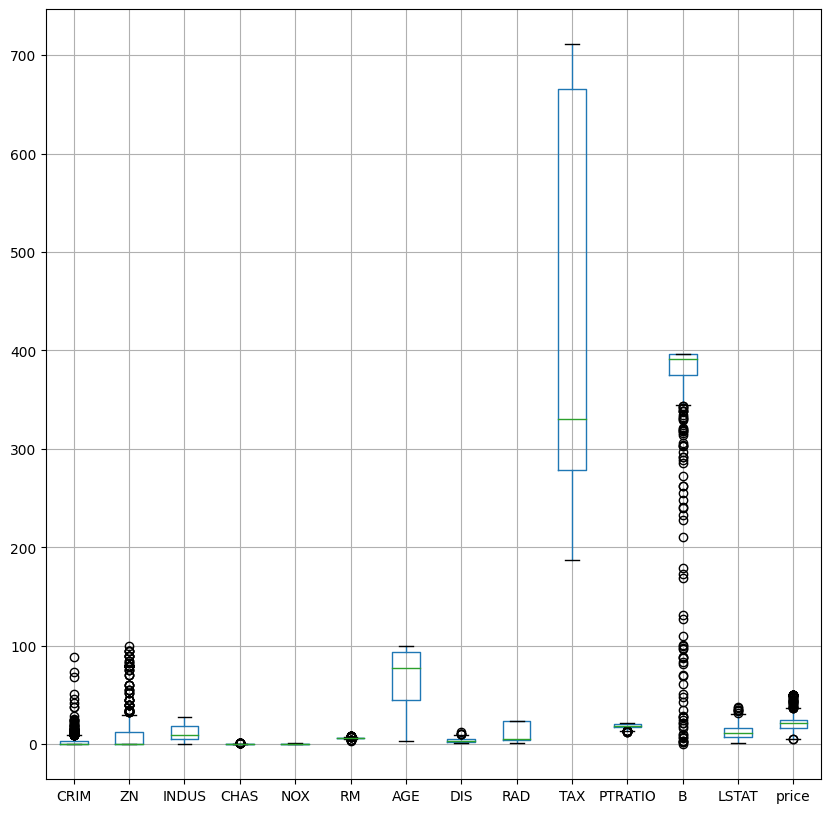

In [23]:
#univariate EDA
fig=plt.figure(figsize=(10,10))
df.boxplot()

<Axes: ylabel='RM'>

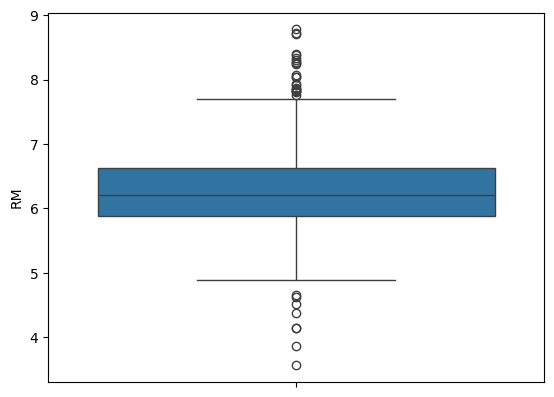

In [24]:
sns.boxplot(df["RM"])

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

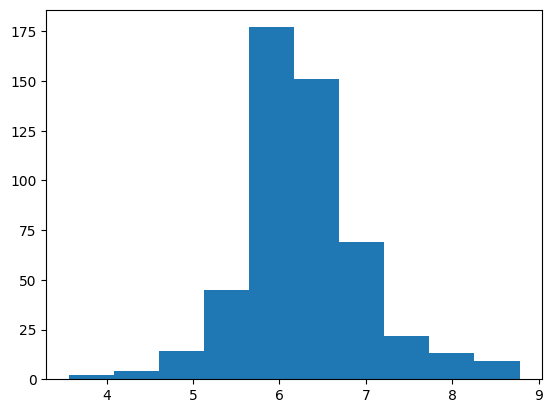

In [25]:
plt.hist(df["RM"])

In [26]:
df["RM"].value_counts()

5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: RM, Length: 446, dtype: int64

<Axes: ylabel='LSTAT'>

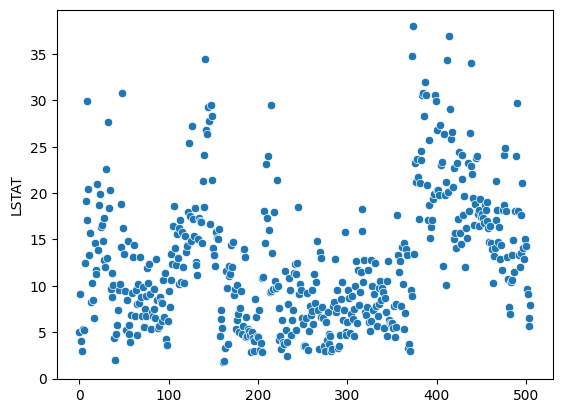

In [27]:
#bivariate EDA
sns.scatterplot(df["LSTAT"])

<Axes: ylabel='price'>

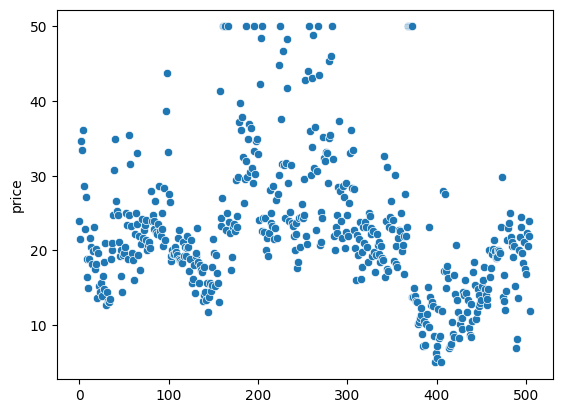

In [28]:
sns.scatterplot(df["price"])

<Axes: ylabel='RM'>

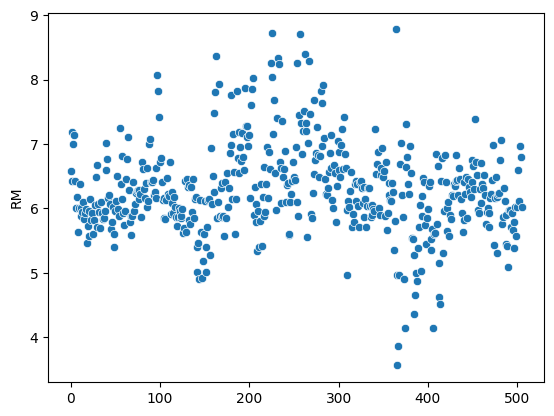

In [30]:
sns.scatterplot(df["RM"])

<Axes: ylabel='price'>

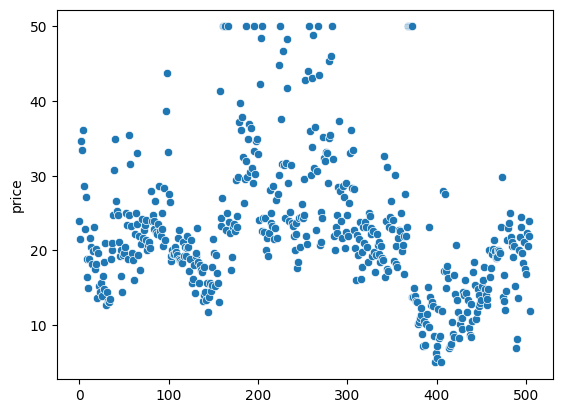

In [31]:
sns.scatterplot(df["price"])

<Axes: >

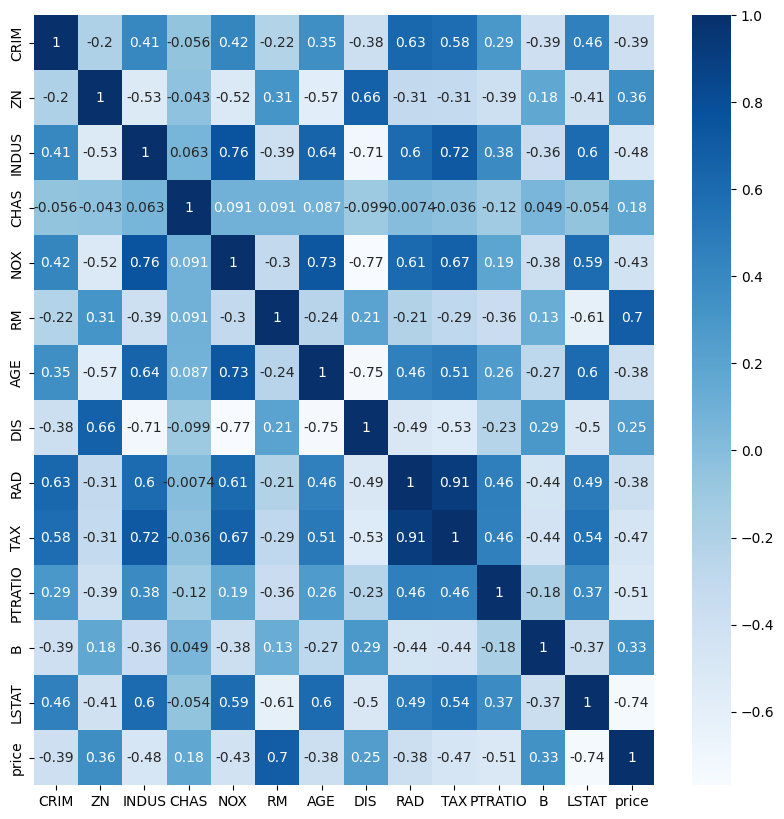

In [32]:
#Multivariate EDA
fig= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [33]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.4 MB/s eta 0:00:00


In [34]:
import tensorflow.keras as tk

In [35]:
model=tk.Sequential()

In [36]:
#adding input layer

model.add(tk.layers.Input(shape=(13,)))

In [37]:
#adding first hidden layer
model.add(tk.layers.Dense(units=6,activation="relu",kernel_initializer="he_uniform"))


In [38]:
#adding second hidden layer
model.add(tk.layers.Dense(units=6,activation="relu",kernel_initializer="he_uniform"))

In [39]:
#adding output layer
model.add(tk.layers.Dense(units=1,activation="relu",kernel_initializer="he_uniform"))

In [40]:
#compiling the model
#model.compile(optimizer="adam",loss="mean_squared_error")

In [41]:
#compiling the model
model.compile(optimizer="adam",loss="mean_absolute_error")

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
df.head()
x=df.iloc[:,:-1]  #independent
display(x)
y=df['price'] #dependent
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [45]:
#training the model
import time
start=time.time()
obj1=model.fit(x=xtrain,y=ytrain,epochs=50,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 25.8104 - val_loss: 26.1399
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 23.7373 - val_loss: 24.8361
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 22.1207 - val_loss: 23.8353
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 20.7012 - val_loss: 22.7671
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 19.4625 - val_loss: 21.9132
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 18.3222 - val_loss: 21.2836
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 17.3612 - val_loss: 20.6548
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 16.5948 - val_loss: 19.8655
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 15.5259 - val_loss: 17.9129
Epoch 10/50
7/7 [==============================] - 0s 10ms/step - loss: 14.2038 - val_loss: 15.9273
Epoch 11/50
7/

In [46]:
ypred=model.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])
ypred

1/1 [==============================] - 0s 104ms/step


array([[24.124668]], dtype=float32)

In [47]:
ypred1=model.predict(xtest)
display(ypred1,ytest)
ypred1.shape,ytest.shape

4/4 [==============================] - 0s 3ms/step


array([[24.566338 ],
       [30.513134 ],
       [29.50504  ],
       [24.668285 ],
       [13.933425 ],
       [ 0.       ],
       [16.486053 ],
       [17.313911 ],
       [21.73257  ],
       [20.692444 ],
       [18.558128 ],
       [21.369003 ],
       [18.623234 ],
       [27.290302 ],
       [28.073112 ],
       [23.015003 ],
       [26.222313 ],
       [15.336799 ],
       [24.41737  ],
       [12.977134 ],
       [15.2937155],
       [13.063773 ],
       [18.955223 ],
       [24.47388  ],
       [26.349892 ],
       [22.455582 ],
       [20.353542 ],
       [10.466125 ],
       [24.049637 ],
       [ 0.       ],
       [25.484768 ],
       [19.576633 ],
       [27.722294 ],
       [27.02842  ],
       [19.217491 ],
       [20.62199  ],
       [ 0.       ],
       [30.17762  ],
       [23.079788 ],
       [22.383492 ],
       [25.461422 ],
       [21.795315 ],
       [17.14872  ],
       [28.129295 ],
       [18.341732 ],
       [24.677624 ],
       [15.699012 ],
       [17.79

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: price, Length: 102, dtype: float64

((102, 1), (102,))

In [48]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(ytest,ypred1)
error

7.082532598458084

<Axes: xlabel='price', ylabel='Density'>

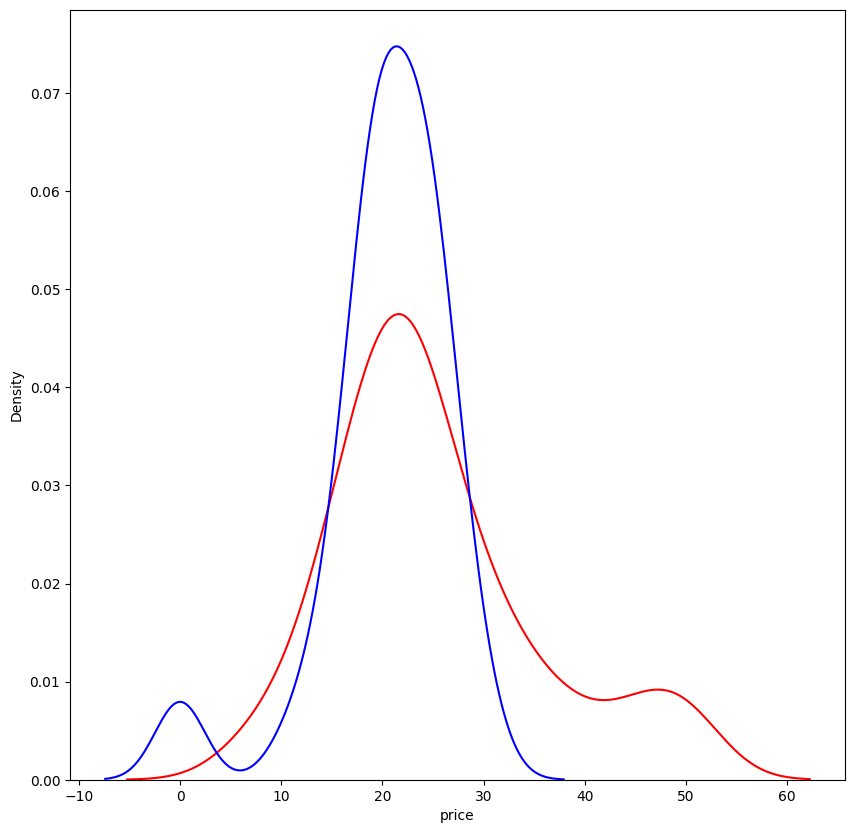

In [49]:
plt.figure(figsize=(10,10))
ax1 = sns.distplot(ytest, hist=False, color="r", label="Actual Value")
sns.distplot(ypred1, hist=False, color="b", label="Predicted Values" , ax=ax1)